# Coastal Systems Notebook 3a: Tidal Environments

In chapter 4 of the textbook, we looked into the global variation in the main processes that shape the coast: wind, waves, and tides. In this notebook, we will focus on the large-scale variation in tides. 
The two main variables on the basis of which tidal environments can be classified are:
- **Magnitude of the tide**, characterised by the tidal range;
- **Tidal character**, determined by the importance of diurnal vs. semi-diurnal components

In this notebook, we will explore both classifications using python code. Therefore, please import the libraries that we need for the analysis from the cell below.


In [3]:
# Run this to import modules

import pathlib
from pathlib import Path
import sys
from warnings import filterwarnings
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import xarray as xr
from datetime import datetime, timedelta
from IPython.display import display, Image
import math
import pandas as pd
import pooch

F_data_fp = pooch.retrieve(
    "https://coclico.blob.core.windows.net/coastal-dynamics/02-tide/02_F_data.pkl",
    known_hash="eae7be0e7b44ed5b211e931bd6e5948e0aa8db067403956fe2d486f69e49c769",
)
F_data = pd.read_pickle(F_data_fp)

<br><br>
## 1. Tidal Environments

The tidal wave is distorted by local differences in water depth and by the location and shape of land masses and large embayments. This results in a global variation in tidal range controlled by the large-scale coastal configuration. The tidal character expressed through mean spring tidal range:


|Category| Mean spring tidal range |
|----------------|:--:|
| Micro-tidal | < 2m | 
| Meso-tidal | 2m - 4m | 
| Macro-tidal | > 4m | 

<br>The tidal character, on the other hand, is defined by the form factor F: <center>*F = (K1 + O1)/(M2 + S2)*,</center>
where *K1*, *O1*, *M2*, and *S2* are the amplitudes of the corresponding tidal constituents. <br><br>

|Category| Value of F |
|----------------|:--:|
| Semi-diurnal | 0 - 0.25 | 
| Mixed, mainly semi-diurnal | 0.25 - 1.5 | 
| Mixed, mainly diurnal | 1.5 - 3 | 
| Diurnal | > 3 | 

<br> In the figure below, you can see the world distribution of mean spring tidal range (*left*) and tidal characters (*right*).
- Look into the semi-enclosed seas vs. open coasts; do you notice anything? Why?
- Compare the two: do you notice any repetitive patterns? Hint: Look at the tidal range for specific tidal characters.

![image](../notebooks/figures/02_tidal_env.png)



<br><br><br>
## 2. Tidal Character at Specific Locations

Let's now categorize the tide at four specific locations. We will once again use the [FES2014 Global Tide data](https://www.aviso.altimetry.fr/en/data/products/auxiliary-products/global-tide-fes/description-fes2014.html), which provides amplitude and phase information for 34 tidal constituents, distributed on 1/16˚ grids.

For each location, the amplitudes of the constituents that are needed to compute the form factor are shown in the table below. 

|Tidal amplitudes [cm]| M2 | S2 | K1 | O1 |
|----------------|:--:|:--:|:--:|----|
| Scheveningen (Netherlands)  | 75.78 | 17.74 | 8.39  |  11.85 | 
| Galveston (US Gulf of Mexico)  | 13.08| 3.97  |  16.17 | 15.89 | 
| Jakarta (Indonesia)| 4.58 |  5.18 |  25.75 | 13.46 |
| Valparaiso (Chile) | 42.91 | 14.40 | 15.29  |  10.22 | 


<br> In cell below, write your own code to calculate the form factor *F* at each location.

In [35]:
# Write your code here.

# solved:
M2 = np.array([75.78, 13.08, 4.58, 42.91])
S2 = np.array([17.74, 3.97, 5.18, 14.40])
K1 = np.array([8.39, 16.17, 25.75, 15.29])
O1 = np.array([11.85, 15.89, 13.46, 10.22])

F = (K1+O1)/(M2+S2)

print(F)


[0.21642429 1.88035191 4.01741803 0.44512302]


In [37]:
# Run to get questions

print("\n What is the category of:")
# from initialize.Tide_Initialize import questions_3a
from Tide_Initialize import questions_3a1

questions_3a1()


 What is the category of:


<br><br>

Let's now plot the tidal characters across the globe obtained from the FES2014 dataset and mark the four locations from above. Do your answers match the locations on the map?

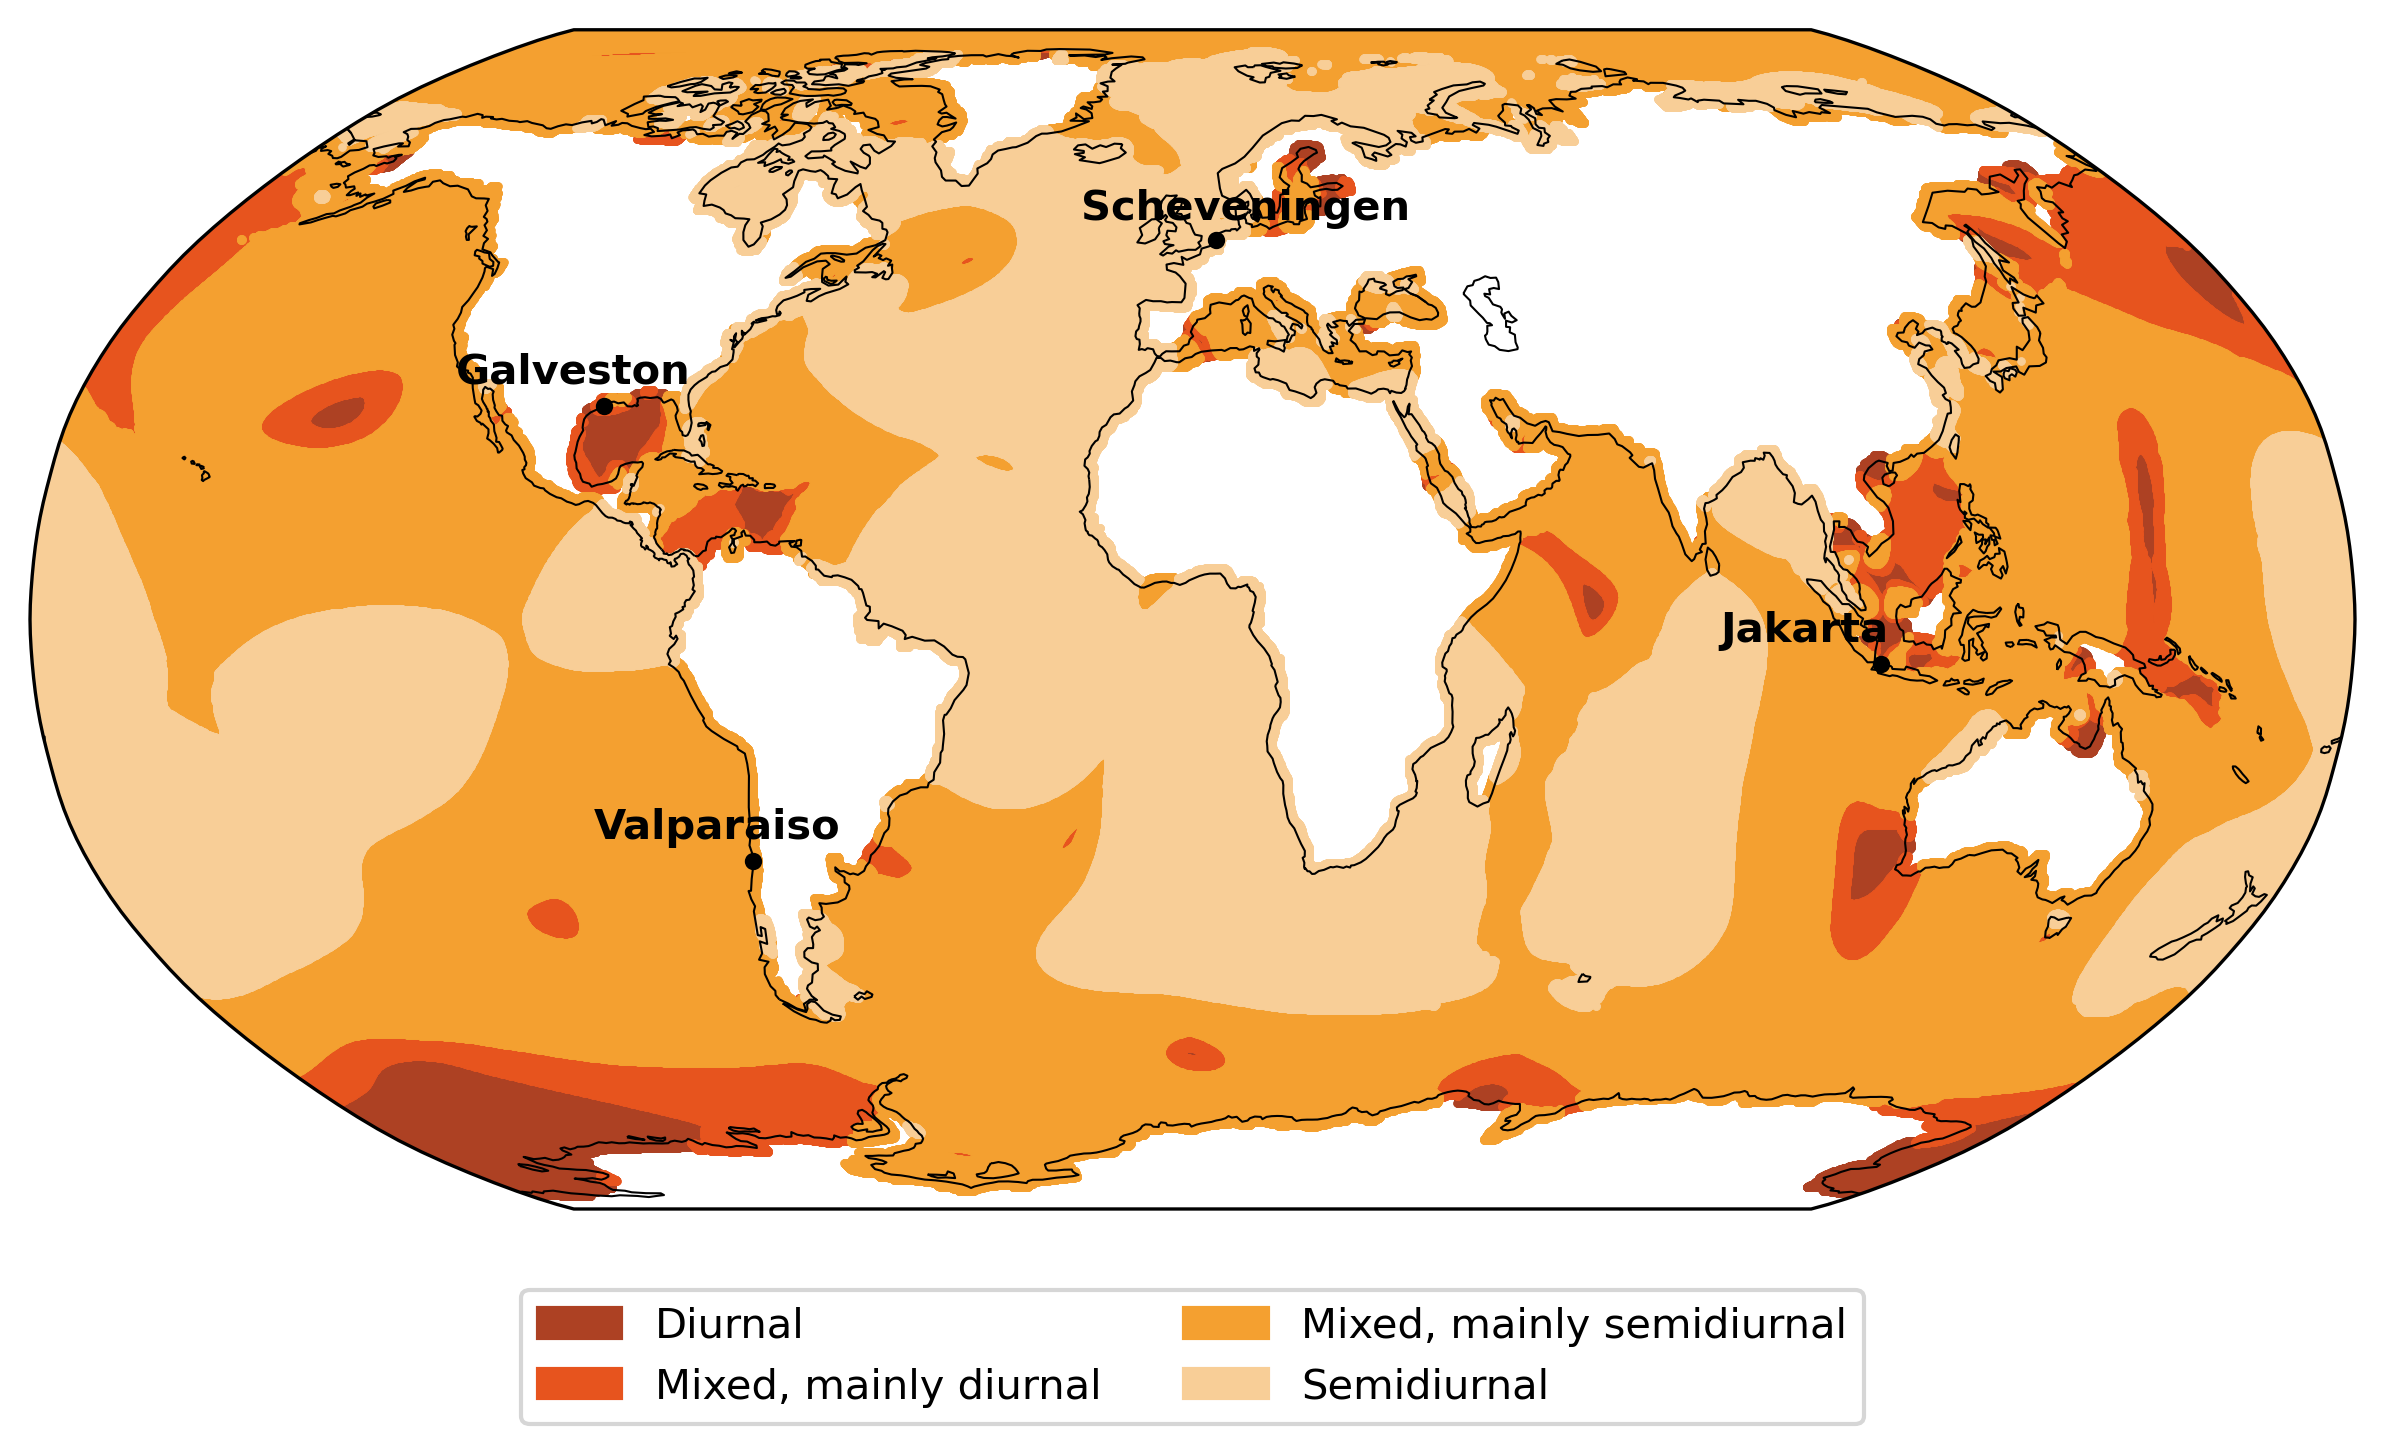

In [31]:
## FES2014 Tidal Characters
# the code is a bit slow, it is doing a global contour!

# Define the categories and corresponding colors
categories = {
    'Diurnal': {'min': 3, 'max': float('inf'), 'color': '#ad4123'},
    'Mixed, mainly diurnal': {'min': 1.5, 'max': 2.9, 'color': '#e7541e'},
    'Mixed, mainly semidiurnal': {'min': 0.25, 'max': 1.49, 'color': '#f4a030'},
    'Semidiurnal': {'min': 0, 'max': 0.249, 'color': '#f8ce97'}
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 11), subplot_kw={'projection': ccrs.Robinson(central_longitude=0.0)})
ax.set_global()

# Plot the scatter points with specific colors for each category
legend_patches = []
for category, values in categories.items():
    subset_data = F_data[(F_data['F'] >= values['min']) & (F_data['F'] <= values['max'])]
    if not subset_data.empty:
        scatter = ax.scatter(subset_data.index.get_level_values('lon').values, 
                             subset_data.index.get_level_values('lat').values, s=1, color=values['color'], 
                             label=category, transform=ccrs.PlateCarree())
        legend_patches.append(Patch(color=scatter.get_facecolor()[0], label=category))

# Add markers for specific locations - here you can edit the code if you are wondering for a specific location
locs = {
    'Scheveningen': [4.25, 52.125],  # lon, lat
    'Galveston': [-94.6875, 29.25],
    'Valparaiso': [-71.625, -33],
    'Jakarta': [106.8125, -6.0625],
}

for loc, coordinates in locs.items():
    lon, lat = coordinates
    ax.scatter(lon, lat, color='black', s=10, transform=ccrs.PlateCarree(), zorder=4)
    ax.text(lon - 25, lat+3, loc, color='black', fontsize=10, fontweight='bold', transform=ccrs.PlateCarree())

ax.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
ax.coastlines(resolution='110m', color='black', linewidth=0.5)

plt.show()


<br><br>
Now that we've identified the tidal characteristics of each location, we can visualize their tidal constituents and address various questions.

Execute the block below to generate an interactive figure. The figure displays the individual tidal components (upper plot) and their combined tidal signal (second plot) for four locations,  each characterized by distinct tidal behaviors.

You can adjust the plotted time range using the slider (from 1 day to 1 year) and select which tidal constituents to display with tick boxes. This allows you to experiment with different constituents, observe the resulting signals, and compare the locations.

Set the time range to around 30 days and \
&emsp;a) select only the main semi-diurnal components \
&emsp;b) select only the main diurnal components \
&emsp;c) select only one semi-diurnal (M2) and one diurnal (K1) component \
&emsp;*What kind of signal do you see for each location? Why are there differences between locations?*

We also know that there are much longer variations than the ones above. Set the time range to the whole year and \
&emsp;a) select only S2 and K2 \
&emsp;b) select only K1 and P1 \
&emsp;*What kind of combined signal can you see now?*

Finally activate all components, including some short period constituents that we will further explore next week. Analyse the combined signals. What are the dominant components at each location?


In [82]:
# from initialize.Tide_Initialize import plot_4timeseries_with_interactive_controls
from Tide_Initialize import plot_4timeseries_with_interactive_controls

# Choose tidal constituents
comps = ['M2', 'S2', 'N2', 'K2',  #semi-diurnal
         'K1', 'O1', 'P1', 'Q1',  #diurnal
         'MM', 'MF', 'SSA',       #long period
         'M4', 'M6', 'S4', 'MN4'] #short period (overtides)

# We choose one year to plot, 2000-2001 same as in the previous Notebook
dates = np.array([
    datetime(2000, 1, 1, 0, 0, 0) + timedelta(seconds=item * 3600)
    for item in range(24*365) #1 year
])

plot_4timeseries_with_interactive_controls(comps, dates, tide_fes)
# We start with the main constituents preselected

<br><br>
# Tidal Beating
Using the knowledge gained from Chapter 3 of the textbook and the interactive figure above, try to answer the questions below. You can use the next cell as a calculator. Give your numeric answer with at least three significant figures.

|Tidal constituents | Name | Equil. <br> Amplitude [m] | Period [h] |
|-|-|-|-|
| **Semi-diurnal** |
| Principal lunar | M2 | 0.24 | 12.4206012 |
| Principal solar | S2 | 0.11 | 12 |
| Lunar elliptical | N2 | 0.046 | 12.65834751 |
| Lunar-solar declinational | K2 | 0.031 | 11.96723606 |
| **Diurnal** |
| Lunar-solar declinational | K1 | 0.14 | 23.93447213 |
| Principal lunar | O1 | 0.10 | 25.81933871 | 
| Principal solar | P1 | 0.047 | 24.06588766 | 
| Lunar elliptical | Q1 | 0.019 | 26.868350 |
| **Long period** |
| Fortnightly | Mf | 0.042 | 327.8599387 |
| Monthly | Mm | 0.022 | 661.3111655 | 
| Semi-annual | Ssa | 0.019 | 4383.076325 | 

In [78]:
# Write your code here to get answers to questions 1 and 2. Use the values from the table above 
# and use at least 3 significant figures.




In [83]:
# Run to get questions. 
# The following answers are interchangeable, so do not put the same answer twice - this will result in a false correct answer.
# A, B
# C, D
# M1, M2
# E, F
# M3, M4
# G, H

# from initialize.Tide_Initialize import questions_3a2
from Tide_Initialize import questions_3a2

questions_3a2()

#1. Answer_A,B = ["m2", "s2"]
#   Answer_N = [14.752, 14.8] # if they use T_m2 = 12.421 we get 14.752
#2. Answer_C,D = ["k1", "o1"]
#    Answer_M = [13.659, 13.7] # if they use T_k1 = 23.934, T_o1 = 25.819 we get 13.659
#3. Answer_M1,M2 = ["march", "september"] 
#    Answer_E,F = ["s2", "k2"]
#4. Answer_M3,M4 = ["june", "december"]
#    Answer_G,H = ["k1", "p1"]



1. In a semi-diurnal environment, spring tide occurs for tidal constituents A and B every N days. Set the time range to around 30 days, which phenomenon can you detect when looking at the combined signal of these two constituents?




2. In a diurnal environment, spring tide occurs for tidal constituents C and D every M days. What is the main difference to the signal from question 1?




3. Strongest semi-diurnal tides are in the months M1 and M2, as can be seen from adding constituents E and F.




4. Strongest diurnal tides are in the months M3 and M4, as can be seen from adding constituents G and H.
